# 1. BTC/USD Dataset (Data split 7:3)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [16]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [17]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [19]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 18ms/step - loss: 0.0112 - val_loss: 8.4799e-04
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0020 - val_loss: 7.2477e-04
Epoch 3/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 5.8046e-04
Epoch 4/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 5.1500e-04
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 5.0838e-04
Epoch 6/100
19/19 [==============================] - 0s 10ms/step - loss: 9.6500e-04 - val_loss: 4.5516e-04
Epoch 7/100
19/19 [==============================] - 0s 10ms/step - loss: 8.8973e-04 - val_loss: 5.4879e-04
Epoch 8/100
19/19 [==============================] - 0s 10ms/step - loss: 8.9877e-04 - val_loss: 4.0650e-04
Epoch 9/100
19/19 [==============================] - 0s 11ms/step - loss: 8.0386e-04 - val_loss: 3.6861e-04
Epoch 10/100
19/19 [============================

In [24]:
y_pred=model.predict(X_test)

14/14 [==============================] - 0s 3ms/step


In [25]:
y_pred=scaler.inverse_transform(y_pred)

In [26]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 31999.516548891894


In [27]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.52623776 0.53278113 0.5339033  0.52861061 0.525498   0.53446595
 0.53506152 0.53283128 0.54803699 0.56012381 0.56818431 0.59989186
 0.63250999 0.62782697 0.62016456 0.63405689 0.62688817 0.62807774
 0.58843508 0.59207586 0.61384531 0.6160536  0.59892171 0.60438837
 0.59022961 0.6103926  0.6041235  0.62607946 0.62921088 0.63069822
 0.62670794 0.61532795 0.62473317 0.60802131 0.62252645 0.60905101
 0.60114568 0.60217851 0.60427553 0.63419168 0.64605909 0.61303816
 0.63363216 0.63365097 0.63078599 0.63015908 0.67762715 0.66444636
 0.67237677 0.66808087 0.6132278  0.61338453 0.59607241 0.60819842
 0.61793276 0.61231722 0.58904475 0.59468694 0.59526683 0.59345349
 0.56193402 0.56701983 0.57001646 0.56771883 0.59709427 0.60192148
 0.60051877 0.62044824 0.61489382 0.60923439 0.61700337 0.61883865
 0.61580911 0.60916699 0.61113863 0.61712405 0.63682313 0.65157276
 0.68030875 0.69022334 0.69836376 0.72439464 0.72082282 0.75304913
 0.75498472 0.75870386 0.75115743 0.75860826 0.753

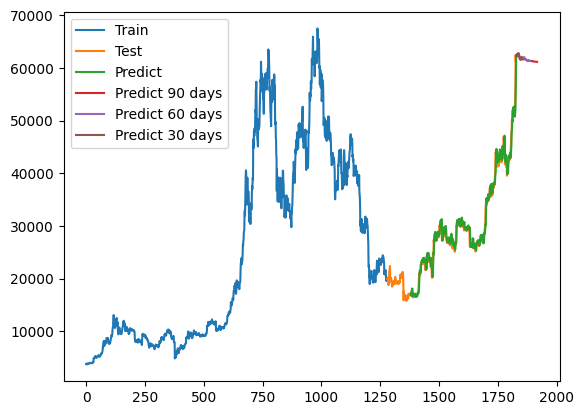

In [28]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 2. ETH/USD Dataset (Data split 7:3)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [26]:
df = pd.read_csv('../Dataset/ETH_USD Binance Historical Data (1).csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [27]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [29]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 19ms/step - loss: 0.0481 - val_loss: 0.0021
Epoch 2/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0041 - val_loss: 0.0019
Epoch 3/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0024 - val_loss: 6.2614e-04
Epoch 4/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0019 - val_loss: 5.2679e-04
Epoch 5/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0017 - val_loss: 7.0615e-04
Epoch 6/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0016 - val_loss: 9.8004e-04
Epoch 7/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0016 - val_loss: 4.3031e-04
Epoch 8/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0013 - val_loss: 4.3872e-04
Epoch 9/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 3.0846e-04
Epoch 10/100
19/19 [==============================] - 0s 10ms/step - los

In [34]:
y_pred=model.predict(X_test)

14/14 [==============================] - 0s 3ms/step


In [35]:
y_pred=scaler.inverse_transform(y_pred)

In [36]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 1935.7625228691063


In [37]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.4158102  0.41979487 0.42027567 0.41585913 0.4084344  0.41295094
 0.40876416 0.41357002 0.42115643 0.43766102 0.44362208 0.45442729
 0.46500061 0.45225305 0.47828002 0.47884804 0.47503994 0.47753116
 0.45053196 0.44588566 0.45794393 0.46967882 0.4494874  0.45132337
 0.44451134 0.44914913 0.44033945 0.44560909 0.45357419 0.4715616
 0.46824706 0.45866512 0.46032877 0.4516829  0.4831497  0.47586326
 0.46624941 0.46465171 0.4625647  0.47749287 0.47817364 0.44714935
 0.45945014 0.45963736 0.45375502 0.44969588 0.4730125  0.47585049
 0.52636842 0.53407822 0.51408251 0.52564722 0.50343473 0.51150407
 0.52783847 0.5156249  0.5025327  0.5072173  0.50301563 0.49983512
 0.46931503 0.45443154 0.45251047 0.44890448 0.45952248 0.45959694
 0.45725464 0.47021068 0.47559095 0.46283488 0.46733227 0.46840236
 0.46567713 0.4642475  0.46681318 0.48187537 0.49294226 0.49185727
 0.50602381 0.50901923 0.51038079 0.54254113 0.53875856 0.56750012
 0.57759903 0.5731761  0.56979775 0.58987429 0.6036

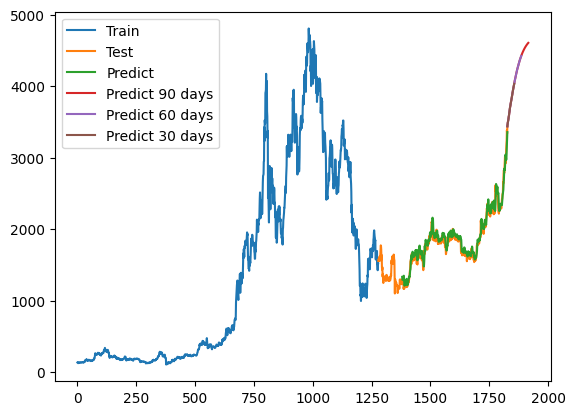

In [38]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 3. BNB/USD Dataset (Data split 7:3)

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [56]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [57]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [58]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [59]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [60]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [61]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [62]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [63]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 17ms/step - loss: 0.0206 - val_loss: 6.1098e-04
Epoch 2/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0018 - val_loss: 3.8293e-04
Epoch 3/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0010 - val_loss: 2.1088e-04
Epoch 4/100
19/19 [==============================] - 0s 10ms/step - loss: 8.6415e-04 - val_loss: 1.7690e-04
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 8.1344e-04 - val_loss: 1.8637e-04
Epoch 6/100
19/19 [==============================] - 0s 10ms/step - loss: 7.6911e-04 - val_loss: 2.8142e-04
Epoch 7/100
19/19 [==============================] - 0s 10ms/step - loss: 7.1266e-04 - val_loss: 2.0339e-04
Epoch 8/100
19/19 [==============================] - 0s 11ms/step - loss: 7.1569e-04 - val_loss: 1.5822e-04
Epoch 9/100
19/19 [==============================] - 0s 10ms/step - loss: 7.0913e-04 - val_loss: 2.1265e-04
Epoch 10/100
19/19 [====================

In [64]:
y_pred=model.predict(X_test)

14/14 [==============================] - 0s 3ms/step


In [65]:
y_pred=scaler.inverse_transform(y_pred)

In [66]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 279.3549488954816


In [67]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.3365425  0.33519285 0.33774219 0.33339332 0.32694499 0.3303941
 0.32694499 0.32739488 0.32874453 0.32964429 0.32814468 0.33624258
 0.33279347 0.3303941  0.33504289 0.34419051 0.34224102 0.34554016
 0.35558755 0.36758443 0.36413532 0.36593486 0.35333813 0.35258833
 0.34449043 0.34853938 0.36533501 0.37628217 0.39322776 0.39232799
 0.39217803 0.38258053 0.38617959 0.43266751 0.47195729 0.47015776
 0.45636135 0.46086018 0.45396197 0.45621139 0.45426189 0.45966049
 0.47150741 0.4619099  0.4469138  0.43941575 0.44136525 0.43761622
 0.44406454 0.44841341 0.4311679  0.43911583 0.43506688 0.46235979
 0.45861076 0.44991302 0.45531162 0.45801092 0.4619099  0.4638594
 0.44496431 0.43416712 0.42561934 0.42366985 0.43941575 0.44451443
 0.44391458 0.45201248 0.44751365 0.43671645 0.43611661 0.4380661
 0.4353668  0.44286486 0.43776618 0.44016556 0.44706376 0.46430928
 0.47180733 0.47060764 0.46700858 0.47780577 0.47300702 0.48680343
 0.51724552 0.52684302 0.51529602 0.51034731 0.513496

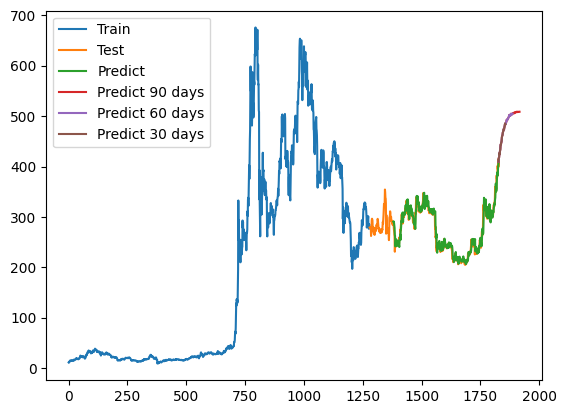

In [68]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 4. BTC/USD Dataset (Data split 8:2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 1s 18ms/step - loss: 0.0026 - val_loss: 8.5693e-04
Epoch 2/100
22/22 [==============================] - 0s 10ms/step - loss: 6.5980e-04 - val_loss: 4.3245e-04
Epoch 3/100
22/22 [==============================] - 0s 10ms/step - loss: 6.0083e-04 - val_loss: 3.7173e-04
Epoch 4/100
22/22 [==============================] - 0s 10ms/step - loss: 6.2770e-04 - val_loss: 3.5313e-04
Epoch 5/100
22/22 [==============================] - 0s 10ms/step - loss: 4.8978e-04 - val_loss: 3.6265e-04
Epoch 6/100
22/22 [==============================] - 0s 10ms/step - loss: 4.7385e-04 - val_loss: 3.1451e-04
Epoch 7/100
22/22 [==============================] - 0s 11ms/step - loss: 4.4956e-04 - val_loss: 2.8184e-04
Epoch 8/100
22/22 [==============================] - 0s 10ms/step - loss: 4.3015e-04 - val_loss: 2.9855e-04
Epoch 9/100
22/22 [==============================] - 0s 10ms/step - loss: 4.2491e-04 - val_loss: 2.6451e-04
Epoch 10/100
22/22 [============

In [10]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


In [11]:
y_pred=scaler.inverse_transform(y_pred)

In [12]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 35607.92553781224


In [13]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.52623776 0.53278113 0.5339033  0.52861061 0.525498   0.53446595
 0.53506152 0.53283128 0.54803699 0.56012381 0.56818431 0.59989186
 0.63250999 0.62782697 0.62016456 0.63405689 0.62688817 0.62807774
 0.58843508 0.59207586 0.61384531 0.6160536  0.59892171 0.60438837
 0.59022961 0.6103926  0.6041235  0.62607946 0.62921088 0.63069822
 0.62670794 0.61532795 0.62473317 0.60802131 0.62252645 0.60905101
 0.60114568 0.60217851 0.60427553 0.63419168 0.64605909 0.61303816
 0.63363216 0.63365097 0.63078599 0.63015908 0.67762715 0.66444636
 0.67237677 0.66808087 0.6132278  0.61338453 0.59607241 0.60819842
 0.61793276 0.61231722 0.58904475 0.59468694 0.59526683 0.59345349
 0.56193402 0.56701983 0.57001646 0.56771883 0.59709427 0.60192148
 0.60051877 0.62044824 0.61489382 0.60923439 0.61700337 0.61883865
 0.61580911 0.60916699 0.61113863 0.61712405 0.63682313 0.65157276
 0.68030875 0.69022334 0.69836376 0.72439464 0.72082282 0.75304913
 0.75498472 0.75870386 0.75115743 0.75860826 0.753

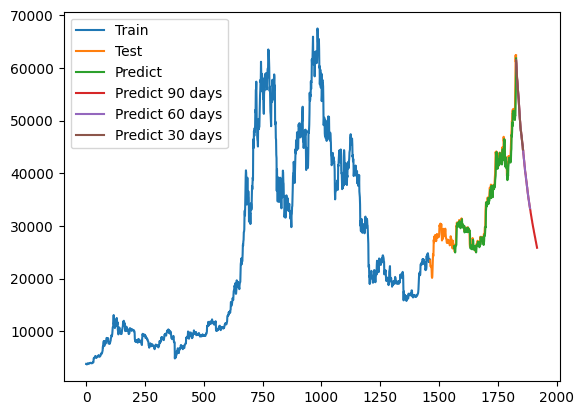

In [14]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 5. ETH/USD Dataset (Data split 8:2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
df = pd.read_csv('../Dataset/ETH_USD Binance Historical Data (1).csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 1s 18ms/step - loss: 0.0456 - val_loss: 0.0047
Epoch 2/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0024 - val_loss: 8.2943e-04
Epoch 3/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0017 - val_loss: 6.0073e-04
Epoch 4/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0015 - val_loss: 4.7725e-04
Epoch 5/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0014 - val_loss: 5.5014e-04
Epoch 6/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0014 - val_loss: 4.0576e-04
Epoch 7/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0013 - val_loss: 4.1639e-04
Epoch 8/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0013 - val_loss: 6.2578e-04
Epoch 9/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 5.8353e-04
Epoch 10/100
22/22 [==============================] - 0s 10ms/step -

In [10]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


In [11]:
y_pred=scaler.inverse_transform(y_pred)

In [12]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 2016.368927519811


In [13]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.4158102  0.41979487 0.42027567 0.41585913 0.4084344  0.41295094
 0.40876416 0.41357002 0.42115643 0.43766102 0.44362208 0.45442729
 0.46500061 0.45225305 0.47828002 0.47884804 0.47503994 0.47753116
 0.45053196 0.44588566 0.45794393 0.46967882 0.4494874  0.45132337
 0.44451134 0.44914913 0.44033945 0.44560909 0.45357419 0.4715616
 0.46824706 0.45866512 0.46032877 0.4516829  0.4831497  0.47586326
 0.46624941 0.46465171 0.4625647  0.47749287 0.47817364 0.44714935
 0.45945014 0.45963736 0.45375502 0.44969588 0.4730125  0.47585049
 0.52636842 0.53407822 0.51408251 0.52564722 0.50343473 0.51150407
 0.52783847 0.5156249  0.5025327  0.5072173  0.50301563 0.49983512
 0.46931503 0.45443154 0.45251047 0.44890448 0.45952248 0.45959694
 0.45725464 0.47021068 0.47559095 0.46283488 0.46733227 0.46840236
 0.46567713 0.4642475  0.46681318 0.48187537 0.49294226 0.49185727
 0.50602381 0.50901923 0.51038079 0.54254113 0.53875856 0.56750012
 0.57759903 0.5731761  0.56979775 0.58987429 0.6036

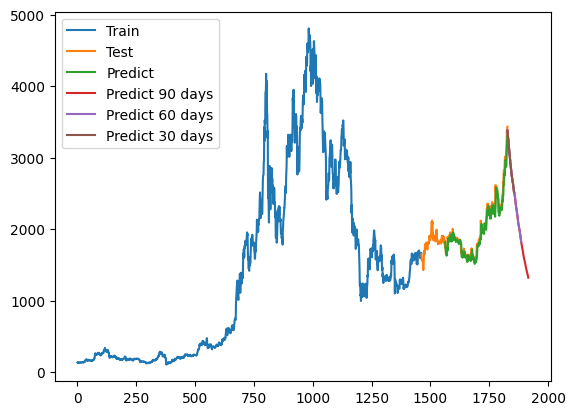

In [14]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 6.BNB/USD Dataset (Data split 8:2)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [16]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [17]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [19]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 1s 17ms/step - loss: 0.0396 - val_loss: 0.0114
Epoch 2/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0049 - val_loss: 6.9946e-04
Epoch 3/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0032 - val_loss: 5.4099e-04
Epoch 4/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0028 - val_loss: 0.0011
Epoch 5/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0026 - val_loss: 4.4053e-04
Epoch 6/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0023 - val_loss: 4.0966e-04
Epoch 7/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 4.2151e-04
Epoch 8/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0020 - val_loss: 4.8276e-04
Epoch 9/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0019 - val_loss: 8.2766e-04
Epoch 10/100
22/22 [==============================] - 0s 10ms/step - los

In [24]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


In [25]:
y_pred=scaler.inverse_transform(y_pred)

In [26]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 253.58090894527274


In [27]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.3365425  0.33519285 0.33774219 0.33339332 0.32694499 0.3303941
 0.32694499 0.32739488 0.32874453 0.32964429 0.32814468 0.33624258
 0.33279347 0.3303941  0.33504289 0.34419051 0.34224102 0.34554016
 0.35558755 0.36758443 0.36413532 0.36593486 0.35333813 0.35258833
 0.34449043 0.34853938 0.36533501 0.37628217 0.39322776 0.39232799
 0.39217803 0.38258053 0.38617959 0.43266751 0.47195729 0.47015776
 0.45636135 0.46086018 0.45396197 0.45621139 0.45426189 0.45966049
 0.47150741 0.4619099  0.4469138  0.43941575 0.44136525 0.43761622
 0.44406454 0.44841341 0.4311679  0.43911583 0.43506688 0.46235979
 0.45861076 0.44991302 0.45531162 0.45801092 0.4619099  0.4638594
 0.44496431 0.43416712 0.42561934 0.42366985 0.43941575 0.44451443
 0.44391458 0.45201248 0.44751365 0.43671645 0.43611661 0.4380661
 0.4353668  0.44286486 0.43776618 0.44016556 0.44706376 0.46430928
 0.47180733 0.47060764 0.46700858 0.47780577 0.47300702 0.48680343
 0.51724552 0.52684302 0.51529602 0.51034731 0.513496

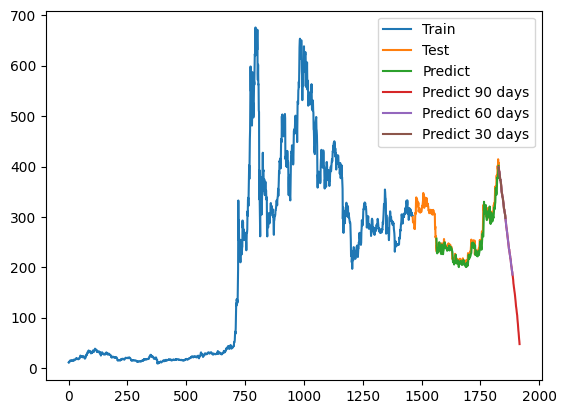

In [28]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 7. BTC/USD Dataset (Data  split 9:1)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [30]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [31]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [32]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [33]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [34]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [37]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 15ms/step - loss: 0.0037 - val_loss: 0.0014
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 6.8415e-04 - val_loss: 7.7159e-04
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 6.0016e-04 - val_loss: 0.0011
Epoch 4/100
25/25 [==============================] - 0s 10ms/step - loss: 6.3467e-04 - val_loss: 7.2991e-04
Epoch 5/100
25/25 [==============================] - 0s 9ms/step - loss: 5.5209e-04 - val_loss: 7.0270e-04
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 5.1791e-04 - val_loss: 7.0933e-04
Epoch 7/100
25/25 [==============================] - 0s 10ms/step - loss: 4.9844e-04 - val_loss: 7.5433e-04
Epoch 8/100
25/25 [==============================] - 0s 9ms/step - loss: 4.8259e-04 - val_loss: 6.7145e-04
Epoch 9/100
25/25 [==============================] - 0s 9ms/step - loss: 5.0967e-04 - val_loss: 8.9936e-04
Epoch 10/100
25/25 [=========================

In [38]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [39]:
y_pred=scaler.inverse_transform(y_pred)

In [40]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 44865.796079038126


In [41]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.52623776 0.53278113 0.5339033  0.52861061 0.525498   0.53446595
 0.53506152 0.53283128 0.54803699 0.56012381 0.56818431 0.59989186
 0.63250999 0.62782697 0.62016456 0.63405689 0.62688817 0.62807774
 0.58843508 0.59207586 0.61384531 0.6160536  0.59892171 0.60438837
 0.59022961 0.6103926  0.6041235  0.62607946 0.62921088 0.63069822
 0.62670794 0.61532795 0.62473317 0.60802131 0.62252645 0.60905101
 0.60114568 0.60217851 0.60427553 0.63419168 0.64605909 0.61303816
 0.63363216 0.63365097 0.63078599 0.63015908 0.67762715 0.66444636
 0.67237677 0.66808087 0.6132278  0.61338453 0.59607241 0.60819842
 0.61793276 0.61231722 0.58904475 0.59468694 0.59526683 0.59345349
 0.56193402 0.56701983 0.57001646 0.56771883 0.59709427 0.60192148
 0.60051877 0.62044824 0.61489382 0.60923439 0.61700337 0.61883865
 0.61580911 0.60916699 0.61113863 0.61712405 0.63682313 0.65157276
 0.68030875 0.69022334 0.69836376 0.72439464 0.72082282 0.75304913
 0.75498472 0.75870386 0.75115743 0.75860826 0.753

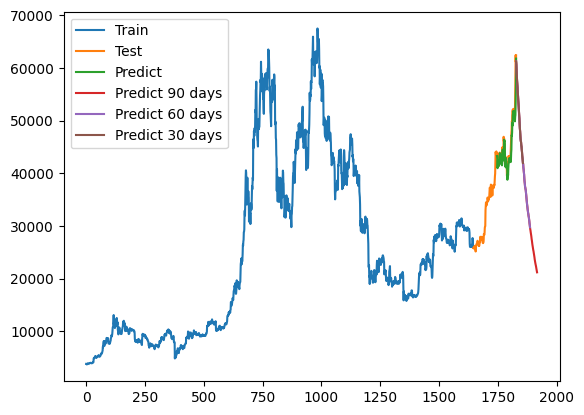

In [42]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()


# 8. ETH/USD Dataset (Data split 9:1)

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [53]:
df = pd.read_csv('../Dataset/ETH_USD Binance Historical Data (1).csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [54]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [55]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [56]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [57]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [58]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [59]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [60]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 15ms/step - loss: 0.0202 - val_loss: 0.0017
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0017 - val_loss: 8.8479e-04
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0013 - val_loss: 8.5998e-04
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 6.9521e-04
Epoch 5/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0010 - val_loss: 6.4113e-04
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 9.7086e-04 - val_loss: 7.0731e-04
Epoch 7/100
25/25 [==============================] - 0s 9ms/step - loss: 8.9211e-04 - val_loss: 7.3052e-04
Epoch 8/100
25/25 [==============================] - 0s 9ms/step - loss: 8.9940e-04 - val_loss: 5.3617e-04
Epoch 9/100
25/25 [==============================] - 0s 9ms/step - loss: 7.9550e-04 - val_loss: 5.4645e-04
Epoch 10/100
25/25 [==============================] - 0s 9m

In [61]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 5ms/step


In [62]:
y_pred=scaler.inverse_transform(y_pred)

In [63]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 2479.7984963542513


In [64]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.4158102  0.41979487 0.42027567 0.41585913 0.4084344  0.41295094
 0.40876416 0.41357002 0.42115643 0.43766102 0.44362208 0.45442729
 0.46500061 0.45225305 0.47828002 0.47884804 0.47503994 0.47753116
 0.45053196 0.44588566 0.45794393 0.46967882 0.4494874  0.45132337
 0.44451134 0.44914913 0.44033945 0.44560909 0.45357419 0.4715616
 0.46824706 0.45866512 0.46032877 0.4516829  0.4831497  0.47586326
 0.46624941 0.46465171 0.4625647  0.47749287 0.47817364 0.44714935
 0.45945014 0.45963736 0.45375502 0.44969588 0.4730125  0.47585049
 0.52636842 0.53407822 0.51408251 0.52564722 0.50343473 0.51150407
 0.52783847 0.5156249  0.5025327  0.5072173  0.50301563 0.49983512
 0.46931503 0.45443154 0.45251047 0.44890448 0.45952248 0.45959694
 0.45725464 0.47021068 0.47559095 0.46283488 0.46733227 0.46840236
 0.46567713 0.4642475  0.46681318 0.48187537 0.49294226 0.49185727
 0.50602381 0.50901923 0.51038079 0.54254113 0.53875856 0.56750012
 0.57759903 0.5731761  0.56979775 0.58987429 0.6036

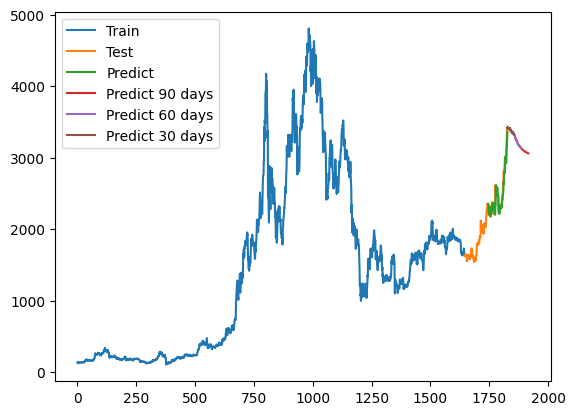

In [65]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()


# 9. BNB/USD Dataset (Data split 9:1)

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [67]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [68]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [69]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [70]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [71]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [72]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [73]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [74]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 15ms/step - loss: 0.0153 - val_loss: 0.0039
Epoch 2/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0025 - val_loss: 7.6970e-04
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0018 - val_loss: 6.7397e-04
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0016 - val_loss: 7.1439e-04
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0015 - val_loss: 5.6723e-04
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0013 - val_loss: 6.1619e-04
Epoch 7/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 8.3578e-04
Epoch 8/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 4.7588e-04
Epoch 9/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0010 - val_loss: 7.9627e-04
Epoch 10/100
25/25 [==============================] - 0s 10ms/step - los

In [75]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [76]:
y_pred=scaler.inverse_transform(y_pred)

In [77]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 316.71504725690846


In [78]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.3365425  0.33519285 0.33774219 0.33339332 0.32694499 0.3303941
 0.32694499 0.32739488 0.32874453 0.32964429 0.32814468 0.33624258
 0.33279347 0.3303941  0.33504289 0.34419051 0.34224102 0.34554016
 0.35558755 0.36758443 0.36413532 0.36593486 0.35333813 0.35258833
 0.34449043 0.34853938 0.36533501 0.37628217 0.39322776 0.39232799
 0.39217803 0.38258053 0.38617959 0.43266751 0.47195729 0.47015776
 0.45636135 0.46086018 0.45396197 0.45621139 0.45426189 0.45966049
 0.47150741 0.4619099  0.4469138  0.43941575 0.44136525 0.43761622
 0.44406454 0.44841341 0.4311679  0.43911583 0.43506688 0.46235979
 0.45861076 0.44991302 0.45531162 0.45801092 0.4619099  0.4638594
 0.44496431 0.43416712 0.42561934 0.42366985 0.43941575 0.44451443
 0.44391458 0.45201248 0.44751365 0.43671645 0.43611661 0.4380661
 0.4353668  0.44286486 0.43776618 0.44016556 0.44706376 0.46430928
 0.47180733 0.47060764 0.46700858 0.47780577 0.47300702 0.48680343
 0.51724552 0.52684302 0.51529602 0.51034731 0.513496

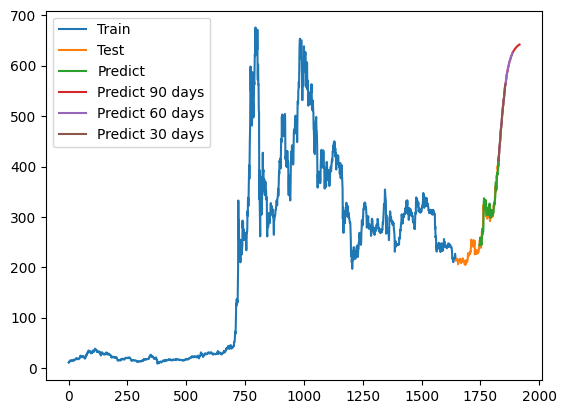

In [79]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()
